# Credit Card Anomaly Detection - Machine Learning

In [17]:
import sys
import joblib as jbl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sys.path.append('..')

# custom libraries
import src.features.build_features as buif
import src.models.train_model as tm
import src.visualization.visualize as vis

In [2]:
# read the data

data = pd.read_csv('../data/raw/creditcard.csv')

In [3]:
# First 5 rows of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
correlated_columns = buif.correlation_columns(data, 'Class', k=.2)
print(correlated_columns)

['V17', 'V14', 'V12', 'V10']


In [6]:
X = data[correlated_columns]
y = data['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.to_csv('../data/interim/X_train.csv', index=None)

## Quantile-Based Anomaly Detection

In [9]:
quantile_model = tm.QuantileBasedAnomalyDetection() # initialize the model, k defaults to 1.5
quantile_model.fit(X_train['V17']) # fit the model to train data
print(f'Training time: {quantile_model.training_elapsed:.2f}s')
predictions = quantile_model.predict(X_test['V17']) # predict the test data
tm.evaluate_perf(y_test, predictions, prettify=True)

Training time: 0.02s


,f1_score,pre_score,rec_score,accuracy
0,0.106101,0.056657,0.833333,0.976335


### Fine-tuning the model

In [10]:
param_grid = {
    'k': np.linspace(1, 10, 100)
}

gs = GridSearchCV(quantile_model, param_grid=param_grid, scoring='f1')
gs.fit(X_train['V17'], y_train)

GridSearchCV(estimator=QuantileBasedAnomalyDetection(),
             param_grid={'k': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
            

In [11]:
gs.best_estimator_

QuantileBasedAnomalyDetection(k=4.909090909090909)

In [12]:
quantile_model = gs.best_estimator_ # initialize the model
quantile_model.fit(X_train['V17']) # fit the model to train data
print(f'Training time: {quantile_model.training_elapsed:.2f}s')
predictions = quantile_model.predict(X_test['V17']) # predict the test data
tm.evaluate_perf(y_test, predictions, prettify=True)

Training time: 0.02s


,f1_score,pre_score,rec_score,accuracy
0,0.613065,0.592233,0.635417,0.998648


In [18]:
# Save model to disk
jbl.dump(quantile_model, '../models/quantile_model.joblib')

['../models/quantile_model.joblib']

### Visualizing the model

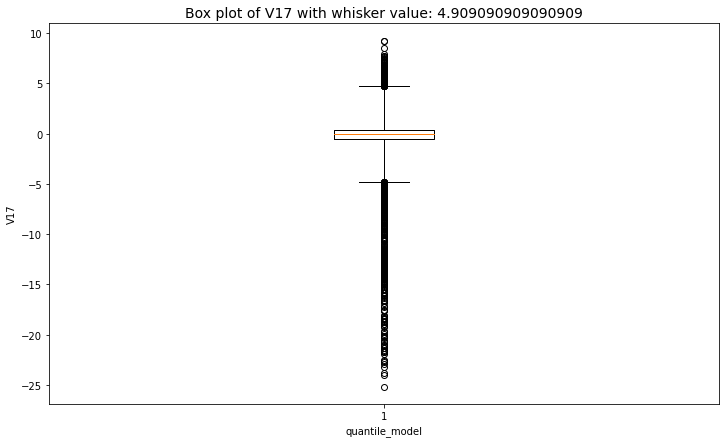

In [15]:
vis.quantile_model_viz(data['V17'], 
                       k=quantile_model.k, 
                       output='../reports/figures/quantile_model_viz.jpeg', 
                       ylabel='V17')